In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing dataset with date as index
df = pd.read_csv(r"C:\Git\Time-Series-Forecasting\Data\raw\SNPTSX.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-16,12298.099609,12412.200195,12232.099609,12407.700195,12407.700195,150614400
1,2012-10-17,12423.700195,12463.299805,12396.700195,12461.299805,12461.299805,194273200
2,2012-10-18,12425.500000,12494.000000,12425.000000,12466.099609,12466.099609,154959500
3,2012-10-19,12437.900391,12465.000000,12372.900391,12416.000000,12416.000000,163589600
4,2012-10-22,12362.700195,12430.500000,12340.400391,12403.500000,12403.500000,155419800


In [4]:
df['Date'] = pd.to_datetime(df['Date']) # convert the Date column type
df.set_index('Date', inplace=True) # setting the Date as index of the data frame
df = df.asfreq('d') # setting index freq as daily

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3651 entries, 2012-10-16 to 2022-10-14
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2509 non-null   float64
 1   High       2509 non-null   float64
 2   Low        2509 non-null   float64
 3   Close      2509 non-null   float64
 4   Adj Close  2509 non-null   float64
 5   Volume     2509 non-null   float64
dtypes: float64(6)
memory usage: 199.7 KB


In [5]:
# filling missing value by interpolating between nearest 2 nearest points
for i in df.columns:
    df[i] = df[i].interpolate(option='linear')    

In [6]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3.651000e+03
mean,15783.190292,15845.749710,15709.464516,15780.685977,15780.685977,2.104085e+08
std,2402.001619,2407.044019,2394.389019,2401.198749,2401.198749,8.687975e+07
min,11657.299805,11870.599609,11172.700195,11228.500000,11228.500000,0.000000e+00
25%,14239.666504,14326.516765,14185.350097,14259.766602,14259.766602,1.652524e+08
50%,15379.099609,15439.766927,15324.199951,15383.799805,15383.799805,2.021128e+08
75%,16537.299805,16566.699219,16480.850586,16519.049805,16519.049805,2.446545e+08
max,22109.699219,22213.099609,22045.199219,22087.199219,22087.199219,9.440374e+08


# Time Series Visualization

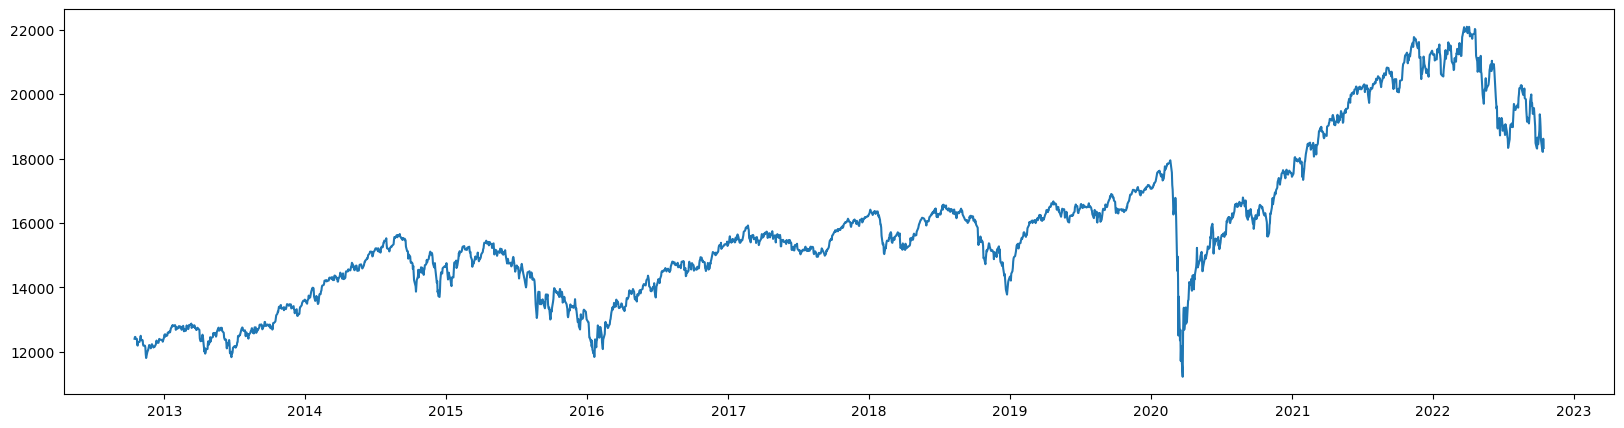

In [8]:
plt.figure(figsize=(20,5))
plt.plot(df['Adj Close'])

The data shows an overall upward trend except 2015-16 fall due to oil price decline, 2020 crash due to Covid-19 and 2022 decline due to Ukraine-Russia war.

For further studies date till 2018-12-31 is considered.

In [9]:
# trim dataset
df = df.loc['2012-10-16':'2018-12-31']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2268 entries, 2012-10-16 to 2018-12-31
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2268 non-null   float64
 1   High       2268 non-null   float64
 2   Low        2268 non-null   float64
 3   Close      2268 non-null   float64
 4   Adj Close  2268 non-null   float64
 5   Volume     2268 non-null   float64
dtypes: float64(6)
memory usage: 124.0 KB


In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-27,14018.000000,14165.500000,13918.299805,14165.200195,14165.200195,2.354147e+08
2018-12-28,14234.200195,14326.900391,14174.000000,14222.000000,14222.000000,2.669286e+08
2018-12-29,14260.266927,14334.333659,14188.833333,14255.633464,14255.633464,2.350713e+08
2018-12-30,14286.333659,14341.766927,14203.666667,14289.266927,14289.266927,2.032139e+08
2018-12-31,14312.400391,14349.200195,14218.500000,14322.900391,14322.900391,1.713566e+08


In [11]:
df.index

DatetimeIndex(['2012-10-16', '2012-10-17', '2012-10-18', '2012-10-19',
               '2012-10-20', '2012-10-21', '2012-10-22', '2012-10-23',
               '2012-10-24', '2012-10-25',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2268, freq='D')

In [12]:
plt.figure(figsize=(20,5))
plt.plot(ts['Open'])

NameError: name 'ts' is not defined

<Figure size 2000x500 with 0 Axes>

# Time Series Stationarity Analysis

## Check Stationarity with Visual Trends

In [13]:
# creating fundtion that takes a series and window size to plot rolling statistics of TS
def plot_rolling_stats(ts, window=30):
    
    mean = ts.rolling(window=window).mean()  # moving average time series
    std = ts.rolling(window=window).std()    # moving standard deviation time series
    
    # Visualize the original time series, moving average, and moving standard deviation as a plot.
    plt.figure(figsize=(10,5))
    orig = plt.plot(ts, color='blue',label='Original')    
    mean = plt.plot(mean, color='red', label='Rolling Mean')
    std = plt.plot(std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')   
    #plt.show(block=False)

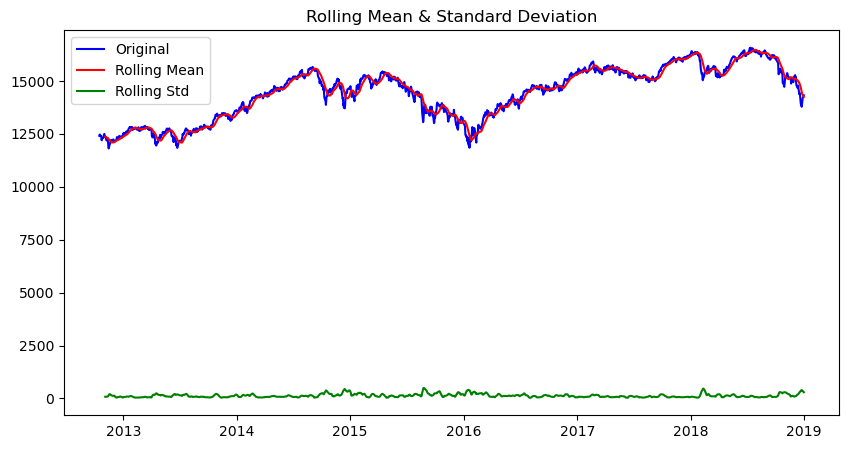

In [14]:
plot_rolling_stats(df['Adj Close'], window=20)

Although the variation in rolling standard deviation is small, The rolling mean is moving with time. Hence, it is not a statinary data.  

## Check Stationarity with Dickey-Fuller Test

In [15]:
# import required package
from statsmodels.tsa.stattools import adfuller

# creating function that takes a series. The output is the test statistics of Dickey-Fuller Test
def test_adf(series):
    print('Augmented Dickey-Fuller Test:')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    
    critical_value = []
    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        critical_value.append(val)
        
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    # Checking conditions for output
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
    if result[0]<critical_value[0]:
        print("ADF test statistic is smaller than 1% critical value")
    elif result[0]<critical_value[1]:
        print("ADF test statistic is smaller than 5% critical value")
    elif result[0]<critical_value[2]:
        print("ADF test statistic is smaller than 10% critical value")
    else:
        print("ADF test statistic is larger than all critical values!!")
        

In [16]:
test_adf(df['Adj Close'])

Augmented Dickey-Fuller Test:
ADF test statistic        -2.016094
p-value                    0.279561
# lags used                1.000000
# observations          2266.000000
critical value (1%)       -3.433239
critical value (5%)       -2.862816
critical value (10%)      -2.567449
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
ADF test statistic is larger than all critical values!!


ADF test statistics is larger than all critical values of different confidence level. Hence, the series is not stationary.  

## Eliminating Trend & Seasonality: 

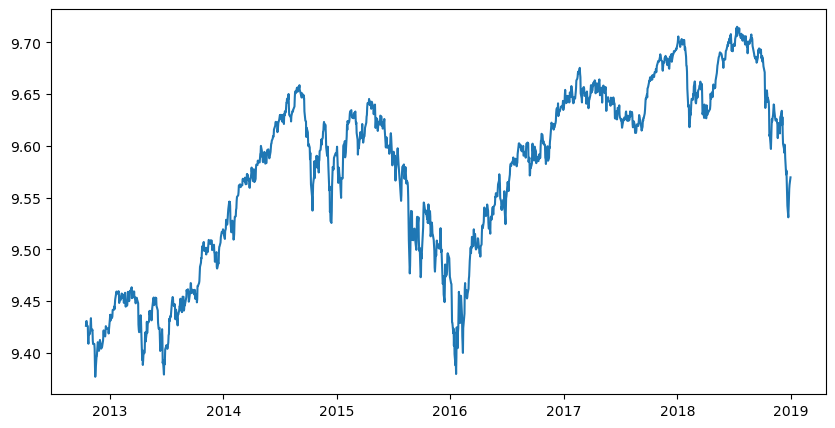

In [17]:
# Log transformation to penalize higher values more than smaller values
df_log = np.log(df["Adj Close"])
plt.figure(figsize=(10,5))
plt.plot(df_log)


In [18]:
# extracting the trend from the series (moving average)
# df_log_mv = df_log.rolling(window=12).mean() 
# plt.figure(figsize=(10,5))
# plt.plot(df_log)
# plt.plot(df_log_mv, color="red")

Since, the stock data have high seasonality and cyclicity, regular trend elimination methods like aggregation, smoothing, polynomial fitting won't work in this data. Differencing or Decomposition is used in such cases.

Differencing takes the difference with a particular time lag (first, second, third order and so on)  

Decomposition is the process of modelling both trend and seasonality and eleminate them from the model. 

### Differencing

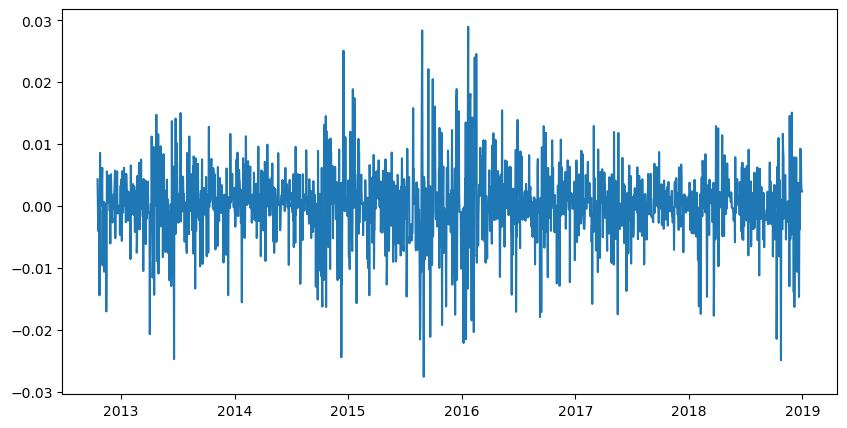

In [19]:
# applying third order differencing
df_log_diff = df_log - df_log.shift() #tuning
plt.figure(figsize=(10,5))
plt.plot(df_log_diff)

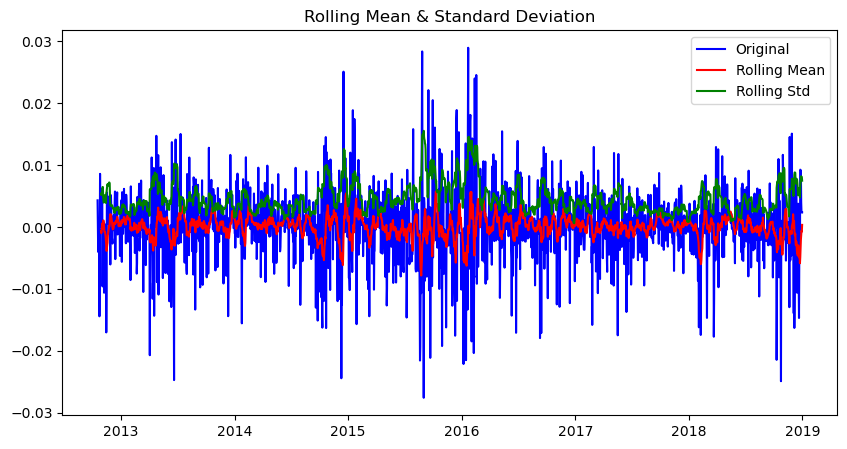

In [20]:
# Check Stationarity of Differencing
# plot visual trends
plot_rolling_stats(df_log_diff, window=12)


In [21]:
# Dickey-Fuller Test
test_adf(df_log_diff)

Augmented Dickey-Fuller Test:
ADF test statistic     -1.168456e+01
p-value                 1.709362e-21
# lags used             1.900000e+01
# observations          2.247000e+03
critical value (1%)    -3.433264e+00
critical value (5%)    -2.862827e+00
critical value (10%)   -2.567455e+00
Reject the null hypothesis
Data has no unit root and is stationary
ADF test statistic is smaller than 1% critical value


### Decomposing

In [22]:
# import required package
from statsmodels.tsa.seasonal import seasonal_decompose

# apply decomposition on TS
df_log_dcom = seasonal_decompose(df_log, model='multiplicative', period = 365) #tuning

trend = df_log_dcom.trend
seasonal = df_log_dcom.seasonal
residual = df_log_dcom.resid

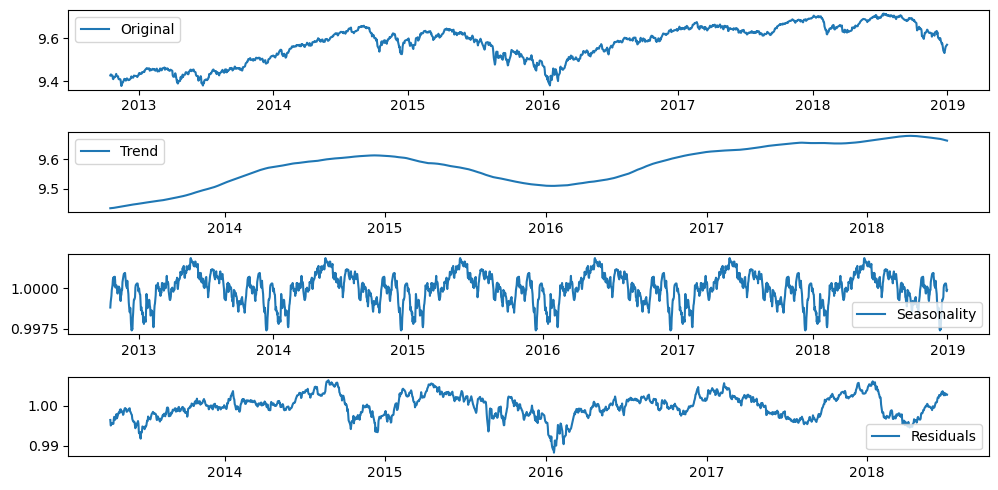

In [23]:
# plotting the trends
plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

The trend ans seasonality are separated. The residuals seems more stationary. 

In [24]:
# Check Stationarity of Residuals
df_log_dcom_resd = residual
df_log_dcom_resd.dropna(inplace=True)

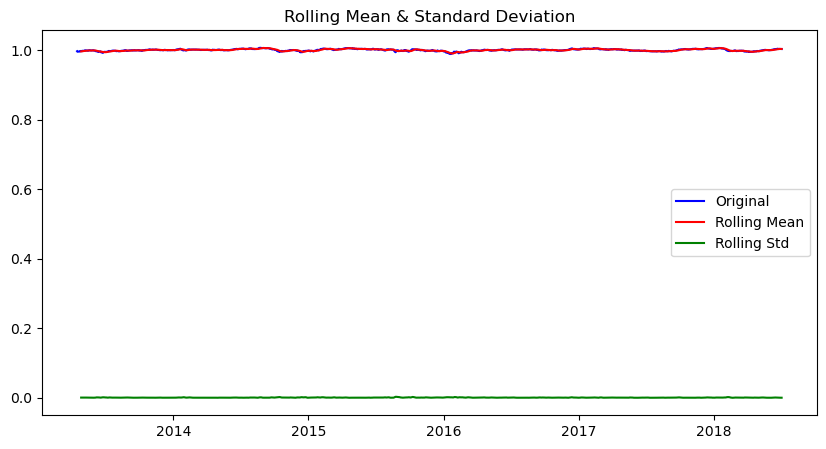

In [25]:
# plot visual trends
plot_rolling_stats(df_log_dcom_resd, window=12)

In [26]:
# Dickey-Fuller Test
test_adf(df_log_dcom_resd)

Augmented Dickey-Fuller Test:
ADF test statistic        -4.323385
p-value                    0.000405
# lags used                1.000000
# observations          1902.000000
critical value (1%)       -3.433793
critical value (5%)       -2.863061
critical value (10%)      -2.567580
Reject the null hypothesis
Data has no unit root and is stationary
ADF test statistic is smaller than 1% critical value


The test statistics is lower than the 1% critical value. Hence, we can say that residuals are stationary.  

# Forecasting using ARIMA

## Plotting ACF and PACF to determine "p", "d" and "q" term of ARIMA

#### Determining "d" with ACF plots and ndiffs

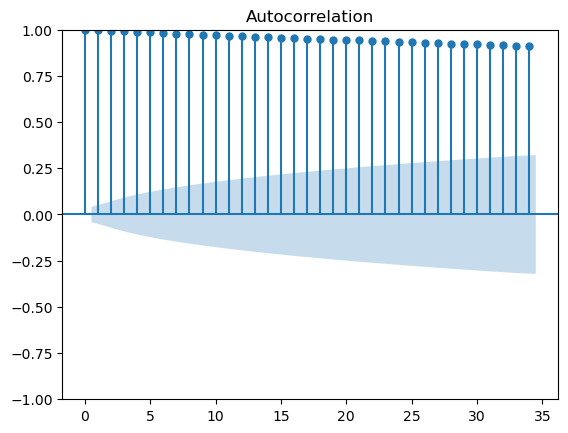

In [29]:
# import required packages
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_log.dropna())   # ACF : Autocorrelation 
plt.show()

In [28]:
# using pdmarima 
from pmdarima.arima.utils import ndiffs

ndiffs(df_log, test='adf')

1

#### Determining "p" with PACF plots 

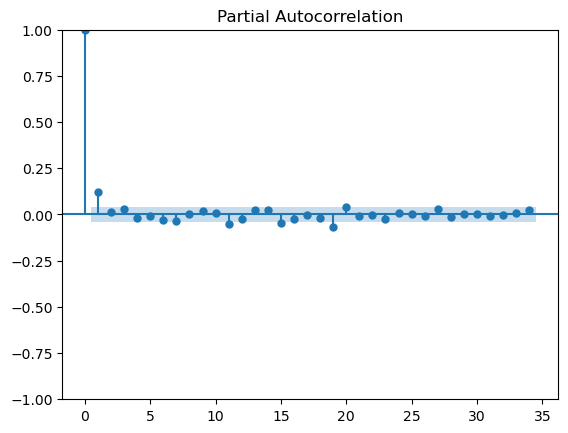

In [31]:
plot_pacf(df_log_diff.dropna(), method='ywm'); # PACF : Partial Autocorrelation 


#### Determining "q" with ACF plots 

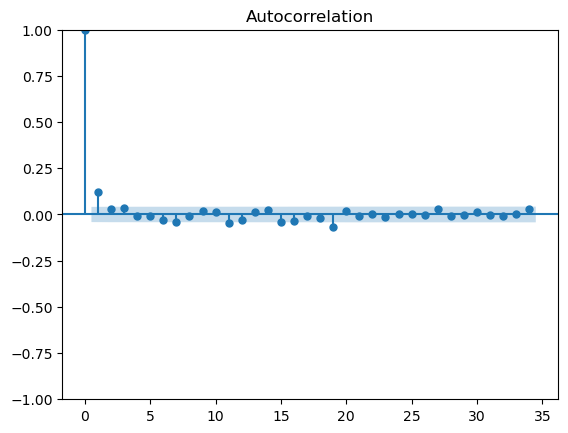

In [32]:
plot_acf(df_log_diff.dropna())   # ACF : Autocorrelation 
plt.show()

In [ ]:
"""
# Method 2: ACF and PACF plots 
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_log.dropna(), nlags=20)
lag_pacf = pacf(df_log.dropna(), nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
"""

In [ ]:
"""
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_log)
pyplot.show()
"""

As per the above results, <br>
Integrated/Differencing: d=1 (ACF cuts confidence interval at 1. Also we checked the ADF test earlier on 1st order) <br>
Autoregression: p=1 (PACF chart cuts confidence interval at 1) <br>
Moving Average: q=1 (ACF chart cuts confidence interval at 1) <br>


# Build Model

In [33]:
# Train and Test Dataset
train_data, test_data = df_log[:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

## Train Model

In [39]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

model = ARIMA(train_data, order=(1, 1, 1)).fit()  # order=(p, d, q)
#model = ARIMA(train_data, order=(1, 1, 1), seasonal_order=(1,1,1,12)).fit()  # order=(p, d, q)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2041
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7832.456
Date:                Wed, 26 Oct 2022   AIC                         -15658.912
Time:                        22:51:38   BIC                         -15642.050
Sample:                    10-16-2012   HQIC                        -15652.726
                         - 05-18-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1624      0.137      1.185      0.236      -0.106       0.431
ma.L1         -0.0342      0.137     -0.249      0.803      -0.303       0.235
sigma2      2.708e-05   4.82e-07     56.172      0.0

NameError: name 'pyplot' is not defined

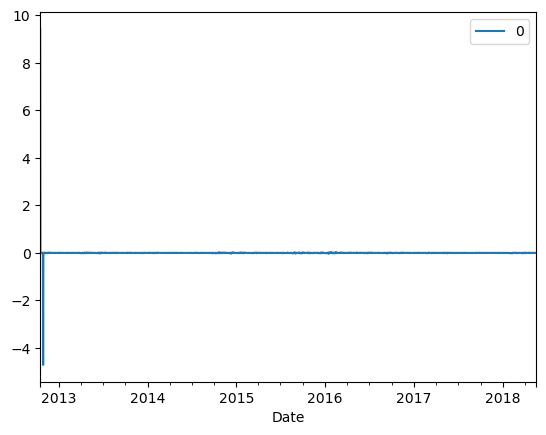

In [35]:
# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
pyplot.show()

In [36]:
# summary stats of residuals
print(residuals.describe())

                 0
count  2041.000000
mean      0.002331
std       0.233376
min      -4.712698
25%      -0.002131
50%       0.000140
75%       0.002334
max       9.426073


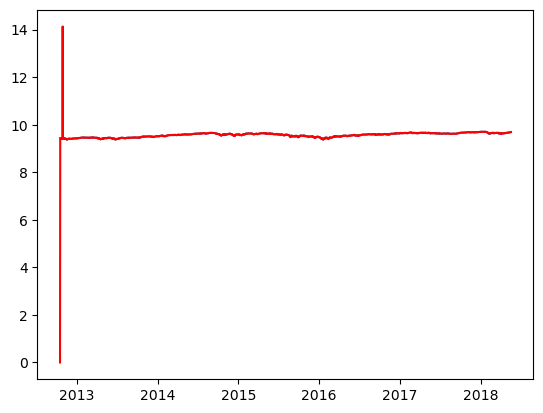

In [37]:
plt.plot(train_data)
plt.plot(model.fittedvalues, color='red')



In [ ]:
# from statsmodels.graphics.tsaplots import plot_predict
# plot_predict(model, '2022-10-15', '2022-11-13')
test_data.head

In [ ]:
# forecast on test
# fc = ARIMAResults.forecast(steps=1, alpha=0.05)  # 95% conf

forecast = model.predict(start='2018-05-19', end='2018-05-26')

# fc_series = pd.Series(fc, index=test_data.index)   # prediction result

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df_log['2018-04-19':'2018-05-26'], label='Train Data')
plt.plot(test_data['2018-04-19':'2018-05-26'], color='green', label='Test Data')
plt.plot(forecast, color='red', label='Predicted')
plt.legend(loc='best')
plt.tight_layout()



